# Barton Springs Salamanders & Watershed Quality Report
### Benjamin Goad, Michelle Gelman, Nick Hoang, Daphne Lopez

Import libraries

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime,date as dt
import sklearn as sk

In our project, we explored how water quality impacted salamander populations across diferent sites 

### Data Prep
Read in the data set and print out the head

In [169]:
rawData  = pd.DataFrame(pd.read_csv("Barton_Springs_Salamanders_DO_and_Flow.csv"))
rawData.head(1000)

c:\Users\00mis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,WATERSHED,SAMPLE_DATE,SITE_NAME,LON_DD_WGS84,LAT_DD_WGS84,SITE_TYPE,MEDIUM,PARAM_TYPE,PARAMETER,QUALIFIER,...,FILTER,SAMPLE_ID,SAMPLE_SITE_NO,METHOD,QC_FLAG,PROJECT,DATA_REF_NO,SAMPLE_REF_NO,TIME_NULL,QC_TYPE
0,Barton Creek,07/06/1990 12:00:00 AM,Barton Spring,-97.770980,30.263535,Spring,Surface Water,Oxygen,DISSOLVED OXYGEN,NaN,...,Dissolved,NaN,35,UNKNOWN,U,Water Watch Dog,2387519,479314,Y,NaN
1,Barton Creek,07/01/1991 12:00:00 AM,Barton Spring,-97.770980,30.263535,Spring,Surface Water,Oxygen,DISSOLVED OXYGEN,NaN,...,Dissolved,NaN,35,HACH TEST KIT,U,Water Watch Dog,1053022,67681,Y,NaN
2,Barton Creek,08/02/1991 12:00:00 AM,Barton Spring,-97.770980,30.263535,Spring,Surface Water,Oxygen,DISSOLVED OXYGEN,NaN,...,Dissolved,NaN,35,HACH TEST KIT,U,Water Watch Dog,557211,67682,Y,NaN
3,Barton Creek,10/11/1991 12:00:00 AM,Barton Spring,-97.770980,30.263535,Spring,Surface Water,Oxygen,DISSOLVED OXYGEN,NaN,...,Dissolved,NaN,35,HACH TEST KIT,U,Water Watch Dog,1052978,67677,Y,NaN
4,Barton Creek,06/04/1992 11:00:00 AM,Barton Spring,-97.770980,30.263535,Spring,Surface Water,Oxygen,DISSOLVED OXYGEN,NaN,...,Dissolved,NaN,35,UNKNOWN,U,Water Watch Dog,2335102,450308,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Barton Creek,04/12/2001 12:00:00 AM,Eliza Spring,-97.770061,30.264246,Spring,Benthic Cover,Salamanders,AUSTIN BLIND SLMNDR (<1IN.) (JUVENILE),NaN,...,Total,NaN,428,VISUAL ASSESSMENT,U,Barton Springs Salamander,1705157,342910,Y,NaN
996,Barton Creek,04/12/2001 12:00:00 AM,Eliza Spring,-97.770061,30.264246,Spring,Benthic Cover,Salamanders,AUSTIN BLIND SALMNDR (ADULT) > 1 INCH,NaN,...,Total,NaN,428,VISUAL ASSESSMENT,U,Barton Springs Salamander,1705158,342910,Y,NaN
997,Barton Creek,04/12/2001 12:00:00 AM,Eliza Spring,-97.770061,30.264246,Spring,Benthic Cover,Salamanders,SALAMANDER (UNKNOWN LENGTH),NaN,...,Total,NaN,428,VISUAL ASSESSMENT,U,Barton Springs Salamander,1680711,342910,Y,NaN
998,Barton Creek,04/12/2001 12:00:00 AM,Eliza Spring,-97.770061,30.264246,Spring,Benthic Cover,Salamanders,AUSTIN BLIND SALAMANDER (UNKNOWN LENGTH),NaN,...,Total,NaN,428,VISUAL ASSESSMENT,U,Barton Springs Salamander,1705163,342910,Y,NaN


## Feature Engineering Plan
- [ ] aggregate sample IDS by parameter types:
    - [ ] get result and unit for each paramater type
    - [ ] do cleanintg for null values
    - [ ] print out a scatter plot for each paratamer_type(check for outliers before normalizing)
    - [ ] print out statistics on each (std, mean, var -> maybe add each as a new column)
    - [ ] groupBy time_null-> see how many records dont have a date. do a time series plot for result + time for each salamander parameter
## What data might we need?
 - how do we condiser the other paramater types? We could maybe see the days when samples were collected, and add salamander paramater as a new feature. Groupby site name?
 - how do salamander poplations vary at different types?
 - what paramater types have a (+/-) correlation with salamnder populations?
 - do any of the paramater types have an affect on the salamnder sizes? does the season explain it, or is it something about the paramater type at that site?
 - maybe we could get a data set with mineral content or weather data? what about water levels?
- [ ] Don't need qualifier, sample IDs, filter, don't need sample_id, sample_site_no, 


In [170]:
# #Need to clean null values and also check what is unknown. Does it matter? Does it lead to significant outliers?
# print("Missing values:")
# print(data.isnull().sum())
# # remove rows with missing sampleIDs, Filter, and Result
# #salamanders of unknown length are noise
# data2 = data.copy()
# data2.dropna(subset=[ 'FILTER', 'RESULT'])
# #data2.drop(data2.loc[data2["PARAMETER"] == 'AUSTIN BLIND SALAMANDER (UNKNOWN LENGTH)'])
# #data2.drop(data2.loc[data2["PARAMETER"] == 'AUSTIN BLIND SALAMANDER (UNKNOWN LENGTH)'])
# print("Missing values:")
# print(data2.isnull().sum())
# data = data2

In [171]:

# #data = data.loc[dtaa["PARAMETER"] == 'BARTON SPRINGS SLMNDR (1-2IN.) IN VEGETATION/MOSS']
# print(len(data))
# data4 = data.loc[data["PARAMETER"] == 'SALAMANDERS NOT PHOTGRAPHED 1-2 INCHES']
# data5 = data.loc[data["PARAMETER"] == 'SALAMANDERS NOT PHOTGRAPHED >2 INCHES']
# data6 = data.loc[data["PARAMETER"] == 'SALAMANDERS PHOTGRAPHED 1-2 INCHES']
# data7 = data.loc[data["PARAMETER"] == 'SALAMANDERS PHOTGRAPHED <1 INCH']
# data10 = data.loc[data["PARAMETER"] == 'SALAMANDERS PHOTGRAPHED >2 INCHES']
# data8 = data.loc[data["PARAMETER"] == 'NUMBER OF BARTON SPRINGS SALAMANDERS PHOTOGRAPHED']
# data9 = data.loc[data["PARAMETER"] == 'NUMBER OF AUSTIN BLIND SALAMANDERS PHOTOGRAPHED']
# data11 = data.loc[data["PARAMETER"] =='AUSTIN BLIND SLMNDR (<1IN.)  (JUVENILE)']
# data11 = data.loc[data["PARAMETER"] =='AUSTIN BLIND SLMNDR (<1IN.)  (JUVENILE)']

# print(len(data4))
# print(len(data5))
# print(len(data6))
# print(len(data7))
# print(len(data8))
# print(len(data9))
# print(len(data10))
# print(len(data11))

# data3 = rawData.loc[rawData["PARAMETER"].str.contains('VEGETATION/MOSS')]
# print(len(data3))
# print(data3["MEDIUM"].unique())
# data_Res = data.loc[data["UNIT"] == "Sq Ft"]


In [172]:
def param_parser(row):
    surfaces = ['VEGETATION/MOSS', 'COBBLE/BOULDER', 'EXPOSED', "LEAF LITTER"]
    sizes = [1,2]
    salamanders =["AUSTIN", "BARTON"]
    new_cols = {"SALAMANDER": 0, "SIZE": 0, "SURFACE": 0}

        
    size_idx_2 = row.find(str(2))
    size_idx_1 = row.find(str(1))

    if size_idx_1 == -1:
        new_cols["SIZE"] = 2

    elif size_idx_1 != -1 and size_idx_2 != -1:
            new_cols["SIZE"] = 1.5
    else:
        new_cols["SIZE"] = 1

    if size_idx_1 == -1 and size_idx_2 == -1:
        return [0, 0, ""]

    surface_idx = -1

    for surface in surfaces:
        surface_idx = row.find(surface)
        if surface_idx != -1:
            surface_str = row[surface_idx:]
            new_cols["SURFACE"] = surface_str
            break

    if (surface_idx == -1):
        return [0,0,""]


    if row[0:1] == 'A':
        new_cols["SALAMANDER"] = 0
    else:
        new_cols["SALAMANDER"] = 1

    
    return list(new_cols.values())

In [173]:

# Austin sal is 0
# Barton sal is 1

#veg = 0, cobble = 1, exposed =2, rock = 3, leaf = 4

data = rawData.copy()
data.drop(columns= ["LON_DD_WGS84","LAT_DD_WGS84","DATA_REF_NO","PROJECT", "QC_FLAG", "QC_TYPE", "SITE_TYPE", "SAMPLE_ID", "WATERSHED", "SAMPLE_SITE_NO", "QUALIFIER", "SAMPLE_REF_NO", "METHOD", "TIME_NULL" ], inplace=True)

data["SAMPLE_DATE"] = data["SAMPLE_DATE"].map(lambda x: x.split(" ")[0])
data["SAMPLE_DATE"] = data["SAMPLE_DATE"].map(lambda x: x.split("/")[0] + "/" + x.split("/")[2])
data["SAMPLE_DATA_NAME"] = data.SAMPLE_DATE + " " + data.SITE_NAME

sal_data = data.loc[data["PARAM_TYPE"] == "Salamanders"]
sal_data.head()

for idx , row in sal_data.iterrows():
    new_vals = param_parser(row["PARAMETER"])
    sal_data.loc[idx, "SALAMANDERS"] = new_vals[0]
    sal_data.loc[idx, "SIZE"] = new_vals[1]
    sal_data.loc[idx, "SURFACE"] = new_vals[2]



c:\Users\00mis\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\Users\00mis\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [174]:
grouped_sal = sal_data.copy()
grouped_sal.drop(["MEDIUM", "UNIT", "FILTER"], axis=1, inplace=True)
grouped_sal = grouped_sal.groupby(["SAMPLE_DATA_NAME", "SAMPLE_DATE", "SITE_NAME", "PARAMETER", "SALAMANDERS", "SIZE", "SURFACE"], as_index=False)
summed_group = grouped_sal.sum()
summed_group = summed_group[summed_group["SURFACE"] != ""].dropna()


o2 = data[data["PARAM_TYPE"] == "Oxygen"]
o2 = o2[o2["UNIT"] != "(%) Percent"]
o2 = o2.groupby(["SAMPLE_DATA_NAME"], as_index=False)
for index, row in o2.mean().iterrows():
    summed_group.loc[summed_group["SAMPLE_DATA_NAME"] == row["SAMPLE_DATA_NAME"], "DISSOLVED_OXYGEN"] = row["RESULT"]

summed_group.fillna(method="ffill", inplace=True)

display(summed_group)


,SAMPLE_DATA_NAME,SAMPLE_DATE,SITE_NAME,PARAMETER,SALAMANDERS,SIZE,SURFACE,RESULT,DISSOLVED_OXYGEN
123,01/2004 Barton Spring,01/2004,Barton Spring,BARTON SPRINGS SLMNDR (<1IN.) IN COBBLE/BOULDER,1.0,1.0,COBBLE/BOULDER,68.0,6.26
134,01/2004 Eliza Spring,01/2004,Eliza Spring,BARTON SPRINGS SLMNDR (1-2IN.) IN COBBLE/BOULDER,1.0,1.5,COBBLE/BOULDER,124.0,6.12
135,01/2004 Eliza Spring,01/2004,Eliza Spring,BARTON SPRINGS SLMNDR (<1IN.) IN COBBLE/BOULDER,1.0,1.0,COBBLE/BOULDER,91.0,6.12
136,01/2004 Eliza Spring,01/2004,Eliza Spring,BARTON SPRINGS SLMNDR (>=2IN.) IN COBBLE/BOULDER,1.0,2.0,COBBLE/BOULDER,16.0,6.12
142,01/2004 Old Mill (Sunken Gardens) Spring,01/2004,Old Mill (Sunken Gardens) Spring,AUSTIN BLIND SLMNDR (1- 2IN.) IN VEGETATION/MOSS,0.0,1.5,VEGETATION/MOSS,1.0,6.25
...,...,...,...,...,...,...,...,...,...
9591,12/2013 Upper Barton Spring,12/2013,Upper Barton Spring,BARTON SPRINGS SLMNDR (<1IN.) ON EXPOSED SUBST...,1.0,1.0,EXPOSED SUBSTRATE,0.0,5.68
9592,12/2013 Upper Barton Spring,12/2013,Upper Barton Spring,BARTON SPRINGS SLMNDR (>=2IN.) IN COBBLE/BOULDER,1.0,2.0,COBBLE/BOULDER,1.0,5.68
9593,12/2013 Upper Barton Spring,12/2013,Upper Barton Spring,BARTON SPRINGS SLMNDR (>=2IN.) IN LEAF LITTER,1.0,2.0,LEAF LITTER,0.0,5.68
9594,12/2013 Upper Barton Spring,12/2013,Upper Barton Spring,BARTON SPRINGS SLMNDR (>=2IN.) IN VEGETATION/MOSS,1.0,2.0,VEGETATION/MOSS,1.0,5.68


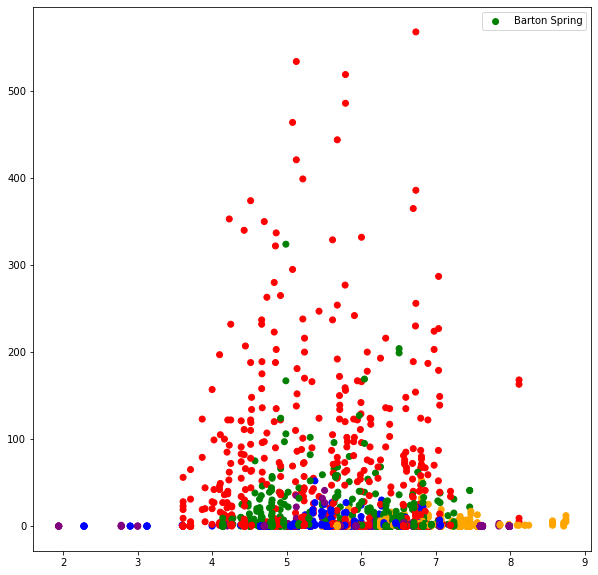

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [175]:
import random

df = summed_group.copy()
df = df[df["DISSOLVED_OXYGEN"] < 10]

colors = {"Eliza Spring": "red", "Old Mill (Sunken Gardens) Spring": "blue", "Barton Spring": "green", "Old Mill Stream (outflow from Sunken Gardens Pool)": "purple", "Upper Barton Spring": "orange"}
sites = df["SITE_NAME"].unique()

plt.figure(figsize=(10, 10))
# for idx, row in df.iterrows():
#     plt.scatter(row["DISSOLVED_OXYGEN"], row["RESULT"], c=colors[row["SITE_NAME"]])
plt.scatter(df["DISSOLVED_OXYGEN"], df["RESULT"], c=df["SITE_NAME"].map(lambda x: colors[x]))
plt.legend(sites)
# plt.scatter(df["DISSOLVED_OXYGEN"], df["RESULT"], c=colors[df["SITE_NAME"]])
plt.show()
plt.figure(figsize=(10, 10))



{'Eliza Spring': 'red', 'Old Mill (Sunken Gardens) Spring': 'blue', 'Barton Spring': 'green', 'Old Mill Stream (outflow from Sunken Gardens Pool)': 'purple', 'Upper Barton Spring': 'orange'}
01/2004


c:\Users\00mis\anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


DISSOLVED_OXYGEN            \
YEAR                                                           2002      2003   
SITE_NAME                                                                       
Barton Spring                                              6.787500  6.679222   
Eliza Spring                                               6.152333  6.218433   
Old Mill (Sunken Gardens) Spring                           6.025417  5.928152   
Old Mill Stream (outflow from Sunken Gardens Pool)              NaN       NaN   
Upper Barton Spring                                             NaN  7.719698   

                                                                        \
YEAR                                                    2004      2005   
SITE_NAME                                                                
Barton Spring                                       6.200178  6.197381   
Eliza Spring                                        5.812473  6.007465   
Old Mill (Sunken Gardens) Spring                    5.847369  6.136364   
Old Mill Stream (outflow from Sunken Gardens Pool)       NaN  6.472500   
Upper Barton Spring                                 6.517396  7.622500   

                                                                        \
YEAR                                                    2006      2007   
SITE_NAME                                                                
Barton Spring                                       4.993804  6.515283   
Eliza Spring                                        4.802222  6.405326   
Old Mill (Sunken Gardens) Spring                    4.048148  5.862247   
Old Mill Stream (outflow from Sunken Gardens Pool)  3.600000  6.379000   
Upper Barton Spring                                      NaN  6.875000   

                                                                        \
YEAR                                                    2008      2009   
SITE_NAME                                                                
Barton Spring                                       5.557556  5.860409   
Eliza Spring                                        5.308437  4.546617   
Old Mill (Sunken Gardens) Spring                    4.732250  6.109643   
Old Mill Stream (outflow from Sunken Gardens Pool)  4.620244  7.190000   
Upper Barton Spring                                 6.500625  7.076000   

                                                                        \
YEAR                                                    2010      2011   
SITE_NAME                                                                
Barton Spring                                       5.835544  4.946441   
Eliza Spring                                        6.522791  4.857422   
Old Mill (Sunken Gardens) Spring                    5.683000  6.011795   
Old Mill Stream (outflow from Sunken Gardens Pool)  5.788182  6.044286   
Upper Barton Spring                                 7.245208  7.245000   

                                                                        \
YEAR                                                    2012      2013   
SITE_NAME                                                                
Barton Spring                                       6.459702  4.586378   
Eliza Spring                                        5.870511  4.763232   
Old Mill (Sunken Gardens) Spring                    5.827805  3.775000   
Old Mill Stream (outflow from Sunken Gardens Pool)  6.522500  4.252941   
Upper Barton Spring                                 6.777000  5.680000   

                                                                    
YEAR                                                    2014  2015  
SITE_NAME                                                           
Barton Spring                                       5.930667  5.98  
Eliza Spring                                        6.032476   NaN  
Old Mill (Sunken Gardens) Spring                    5.700000  6.13  
Old Mill Stream (outflo

SALAMANDERS      SIZE     RESULT  DISSOLVED_OXYGEN
SITE_NAME           YEAR                                                    
Barton Spring       2002     0.750000  1.000000  13.250000          6.787500
                    2003     0.666667  1.000000  10.833333          6.679222
                    2004     0.956522  1.369565  11.652174          6.200178
                    2005     1.000000  1.500000  36.095238          6.197381
                    2006     0.913043  1.413043  34.478261          4.993804
...                               ...       ...        ...               ...
Upper Barton Spring 2011     0.500000  1.500000   0.458333          7.245000
                    2012     0.542857  1.500000   1.333333          6.777000
                    2013     0.500000  1.500000   0.125000          5.680000
                    2014     1.000000  1.000000   1.000000          4.500000
                    2015     0.500000  1.500000   0.000000          7.430000

[63 rows x 4 columns]

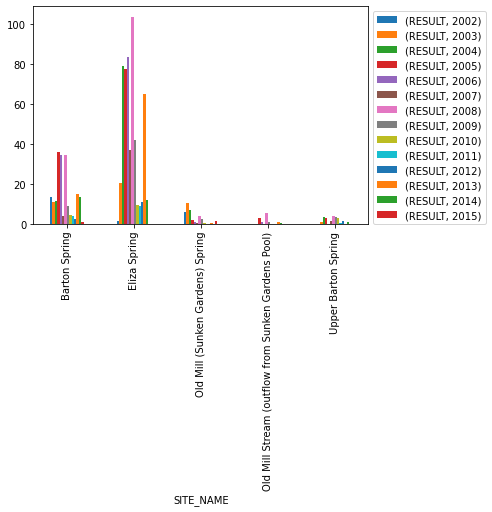

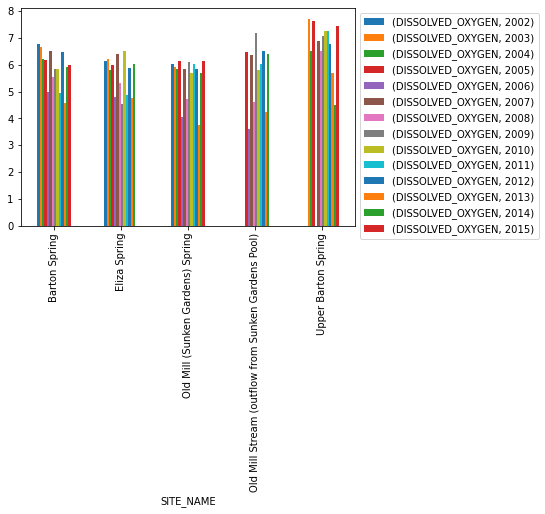

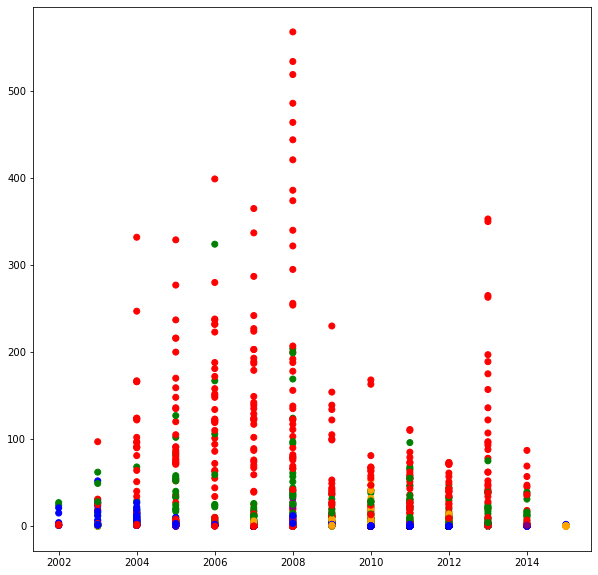

c:\Users\00mis\anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


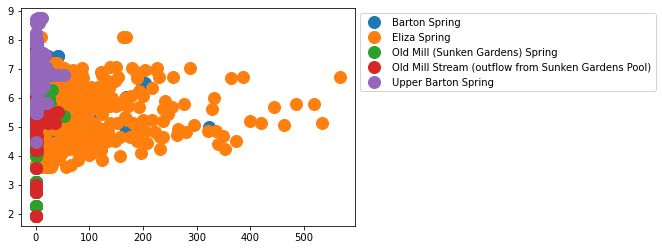

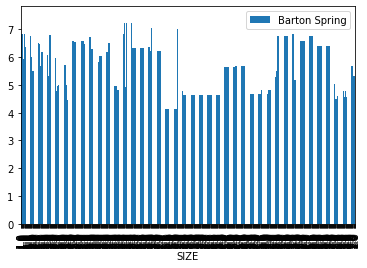

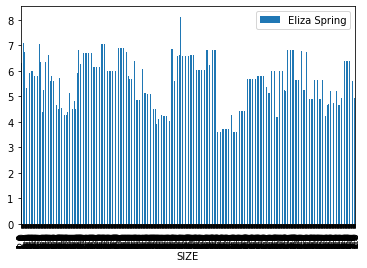

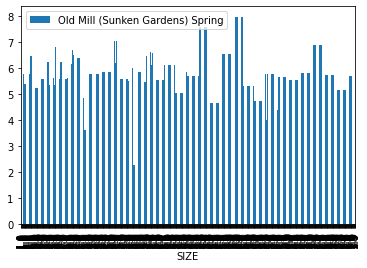

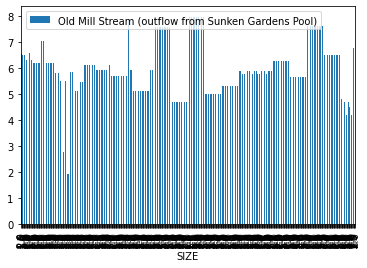

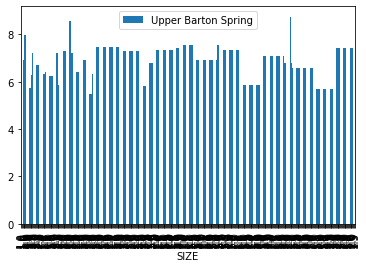

In [176]:
print(colors)

date_format = pd.DatetimeIndex(df["SAMPLE_DATE"])
df["YEAR"] = date_format.year
#print(df["YEAR"])
df = df.sort_values(by = "YEAR")

min_date = df["SAMPLE_DATE"].min()
print(min_date)

#display(df)

grouped_sites = df.groupby(["SITE_NAME", "YEAR"])
grouped_means = grouped_sites.mean()
grouped_sites.fillna(method="ffill", inplace=True)
grouped_means_sal_counts = grouped_sites[["RESULT"]].mean().unstack('YEAR')
grouped_means_sal_counts.plot(kind="bar").legend(bbox_to_anchor=(1.0, 1.0))

grouped_means_sal_counts = grouped_sites[["DISSOLVED_OXYGEN"]].mean().unstack('YEAR')
grouped_means_sal_counts.plot(kind="bar").legend(bbox_to_anchor=(1.0, 1.0))


display(grouped_means_sal_counts)
display(grouped_means)

plt.figure(figsize=(10, 10))
plt.scatter(df["YEAR"], df["RESULT"], c=df["SITE_NAME"].map(lambda x: colors[x]))
plt.show()

grouped_res = df.groupby(["SITE_NAME"])
grouped_res.fillna(method="ffill", inplace=True)
display(grouped_res)
#GROU.plot.bar(x="DISSOLVED_OXYGEN", y="SIZE")

fig, ax = plt.subplots()
ax.margins(0.05) 
for name, group in grouped_res:
    ax.plot(group.RESULT, group.DISSOLVED_OXYGEN, marker='o', linestyle='', ms=12, label=name)
    group.plot.bar(x='SIZE', y='DISSOLVED_OXYGEN', label=name)
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()



#grouped_sites.plot(x="SITE_NAME", y=["RESULT"], kind = "bar")
#grouped_sites['RESULT'].plot(legend =True, kind='bar')



## Models

In [177]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#k-means for oxygen and salamder counts

#one-hot encoding for surface
pca_df = pd.get_dummies(df, columns= ["SURFACE"])

pca_df.drop(["SAMPLE_DATA_NAME", "PARAMETER", "SITE_NAME", "SAMPLE_DATE"], axis= 1, inplace=True)
# Remove categorical columns and pca reduction
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pca_df)
pca = PCA(n_components=.95,svd_solver ="full")
pca_data = pca.fit_transform(scaled_data)
df_data = pd.DataFrame(pca_data)
#df_data.head()



#PCA Reduced




In [161]:
from sklearn.manifold import MDS

def scatter(data, labels, numPoints = 500):

    numEntries = data.shape[0]
    start = random.randint(0, numEntries - numPoints)
    end = start + numPoints
    data = data.iloc[start:end, :]
    labels = labels.iloc[start:end]
    
    mds = MDS(n_components=2)
    mds_data = mds.fit_transform(data)
    plt.scatter(mds_data[:, 0], mds_data[:, 1], c=labels, s=50)
    plt.show()

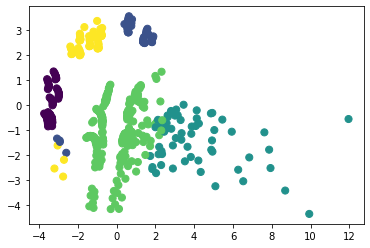

The best number of clusters is 0       4
1       3
2       0
3       3
4       4
       ..
3088    1
3089    3
3090    0
3091    4
3092    1
Length: 3093, dtype: int32
The Sillhouette score for the best clustering is 0.37070455631261123


In [180]:
#K-MEANS Clustering

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#Estimated Eps = 6

best_clustering = (None, None)
for i in range(2, 7):
    kmeans = KMeans(n_clusters=i)
    k_labels = kmeans.fit_predict(df_data) #npArray
    s_score = silhouette_score(df_data, k_labels)
    if best_clustering[1] == None:
        best_clustering = (pd.Series(k_labels), s_score)
    elif s_score >= best_clustering[1]:
        best_clustering = (pd.Series(k_labels), s_score) 
          
scatter(df_data, best_clustering[0])
print("The best number of clusters is", best_clustering[0])
print("The Sillhouette score for the best clustering is", best_clustering[1])

In [165]:
# your code goes here
df_data = pd.get_dummies(df, columns= ["SURFACE", "SITE_NAME"])
df_data.drop(["SAMPLE_DATA_NAME", "PARAMETER", "SAMPLE_DATE"], axis=1, inplace=True)
data_Y = df_data["RESULT"].ravel()
data_X = df_data.drop(['RESULT'], axis =1)
print(data_Y.shape)
print(data_X.shape)
data_X.head()


(3093,)
(3093, 13)


,SALAMANDERS,SIZE,DISSOLVED_OXYGEN,YEAR,SURFACE_COBBLE/BOULDER,SURFACE_EXPOSED SUBSTRATE,SURFACE_LEAF LITTER,SURFACE_VEGETATION/MOSS,SITE_NAME_Barton Spring,SITE_NAME_Eliza Spring,SITE_NAME_Old Mill (Sunken Gardens) Spring,SITE_NAME_Old Mill Stream (outflow from Sunken Gardens Pool),SITE_NAME_Upper Barton Spring
6669,1.0,1.0,5.775000,2002,0,0,0,1,0,0,1,0,0
5511,1.0,2.0,6.290000,2002,0,0,0,1,0,1,0,0,0
8097,1.0,1.0,6.101667,2002,1,0,0,0,0,1,0,0,0
8106,1.0,1.0,5.781667,2002,0,0,0,1,0,0,1,0,0
6662,0.0,1.0,5.775000,2002,0,0,0,1,0,0,1,0,0


In [178]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y, test_size =.2)
print("X_train=",X_train.shape, " y_train=", Y_train.shape)
print("X_test=",X_test.shape, " y_test=", Y_test.shape)

clf = DecisionTreeClassifier(criterion="entropy")
#these are features and labels
clf.fit(X_train, Y_train)
#from sklearn import tree
#tree.plot_tree(clf)

#testing the test data
pred_Y = clf.predict(X_test)

acc = sk.metrics.accuracy_score(Y_test, pred_Y)
print(f"the accuracy is:{acc}")


X_train= (2474, 13)  y_train= (2474,)
X_test= (619, 13)  y_test= (619,)
the accuracy is:0.5864297253634895


For our models, we used cross validaion to tune the hyparemeters for max peth an

In [ ]:
#Cross Validaiton: K-MEANS and Decision Tree
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_weight_fraction_leaf=2)
clf = clf.fit(data_X, data_Y)

